In [1]:
pip install nltk

<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [3]:
import NLTK

<class 'ModuleNotFoundError'>: No module named 'NLTK'

In [7]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error unknown url type:
[nltk_data]     https>


False

In [3]:
%pip install nltk

In [4]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error unknown url type:
[nltk_data]     https>


False

In [9]:
import nltk

# Set the NLTK data path
nltk.data.path.append('notebooks/english')


In [10]:
stop_words = set(stopwords.words('english'))

<class 'LookupError'>: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/pyodide/nltk_data'
    - '/nltk_data'
    - '/share/nltk_data'
    - '/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - 'notebooks/english'
    - 'notebooks/english'
    - 'notebooks/english'
**********************************************************************


In [12]:
import nltk

# Set the NLTK data path
nltk.data.path.append('notebooks/english')

In [13]:
# Load stopwords
stop_words = set(stopwords.words('notebooks/english'))

<class 'LookupError'>: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/pyodide/nltk_data'
    - '/nltk_data'
    - '/share/nltk_data'
    - '/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - 'notebooks/english'
    - 'notebooks/english'
    - 'notebooks/english'
    - '/path/to/nltk_data'
    - 'notebooks/english'
**********************************************************************


In [39]:
import pandas as pd

# Replace 'file1.txt', 'file2.txt', 'file3.txt' with your actual file paths
df1 = pd.read_csv('Becomingref.csv', names=['Lemma', 'Count'])
df2 = pd.read_csv('Blumenthal.csv', names=['Lemma', 'Count'])
df3 = pd.read_csv('Isaacson.csv', names=['Lemma', 'Count'])


In [40]:
combined_df = pd.concat([df1, df2, df3], ignore_index=True)


In [41]:
aggregated_df = combined_df.groupby('Lemma')['Count'].sum().reset_index()


In [42]:
top_20_lemmas = aggregated_df.sort_values(by='Count', ascending=False).head(20)


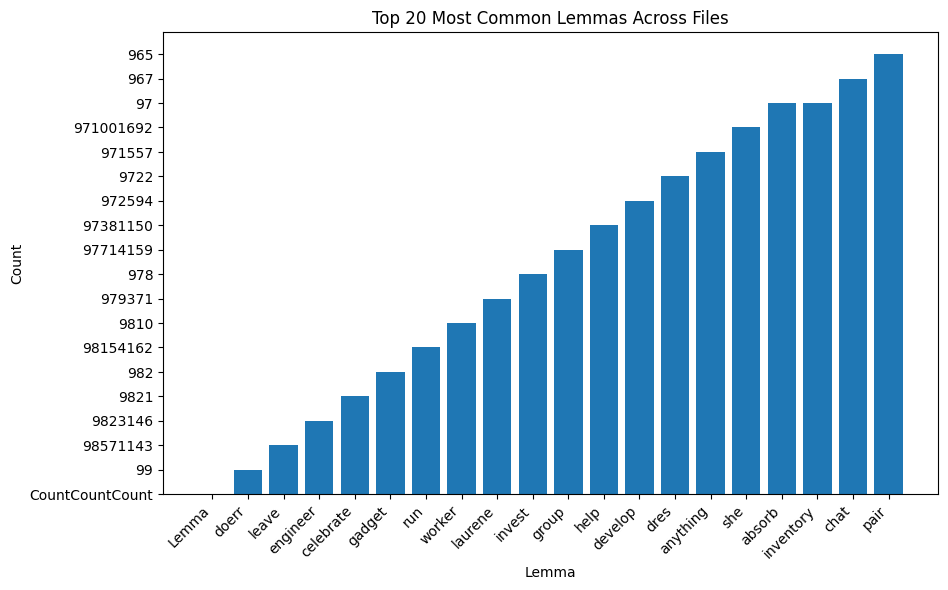

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_20_lemmas['Lemma'], top_20_lemmas['Count'])
plt.xlabel('Lemma')
plt.ylabel('Count')
plt.title('Top 20 Most Common Lemmas Across Files')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:

# Replace 'your_file.csv' with the actual path to your CSV file
csv_file_path = 'Becomingref.txt'

# Read CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Sort the DataFrame by 'count' in descending order
df_sorted = df.sort_values(by='count', ascending=False)

# Plot the top N lemmas (change N to the desired number)
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Lemma', data=df_sorted.head(top_n))
plt.title(f'Top {top_n} Lemmas by Count')
plt.xlabel('Count')
plt.ylabel('Lemma')
plt.show()



In [26]:
%pip install seaborn


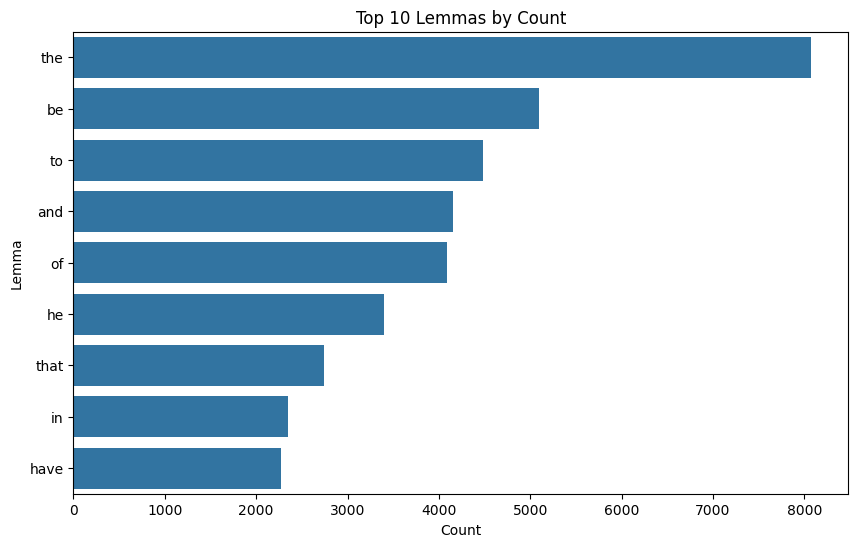

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the actual path to your CSV file
csv_file_path = 'Becomingref.csv'

# Read CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Sort the DataFrame by 'count' in descending order
df_sorted = df.sort_values(by='Count', ascending=False)

# Plot the top N lemmas (change N to the desired number)
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Lemma', data=df_sorted.head(top_n))
plt.title(f'Top {top_n} Lemmas by Count')
plt.xlabel('Count')
plt.ylabel('Lemma')
plt.show()


/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


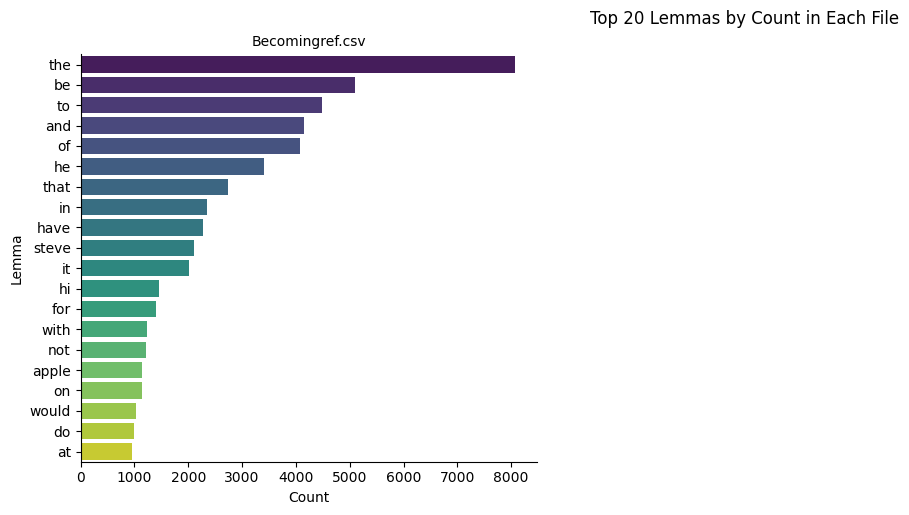

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Becomingref.csv', 'Blumenthal.csv', 'Isaacson.csv' with the actual file paths
file_paths = ['Becomingref.csv', 'Blumenthal.csv', 'Isaacson.csv']

# Create an empty list to store DataFrames for each file
dfs = []

# Read each CSV file into a Pandas DataFrame and add a 'File' column
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df['File'] = file_path  # Add a 'File' column with the file name
    dfs.append(df)

# Concatenate DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Group by 'File' and 'Lemma' and sum the counts
aggregated_df = combined_df.groupby(['File', 'Lemma'])['Count'].sum().reset_index()

# Sort the DataFrame by 'Count' in descending order within each file group
aggregated_df_sorted = aggregated_df.sort_values(by=['File', 'Count'], ascending=[True, False])

# Plot the top N lemmas for each file
top_n = 20
g = sns.FacetGrid(aggregated_df_sorted.head(top_n), col='File', col_wrap=3, height=5, margin_titles=True)
g.map(sns.barplot, 'Count', 'Lemma', palette='viridis', order=aggregated_df_sorted['Lemma'].head(top_n))
g.set_axis_labels('Count', 'Lemma')
g.set_titles(col_template='{col_name}')
plt.suptitle(f'Top {top_n} Lemmas by Count in Each File', y=1.02)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_supersense_file.csv' with the actual path to your CSV file
csv_file_path = 'your_supersense_file.csv'

# Read CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path, index_col=0)  # Assuming the first column contains book names

# Plot a bar chart
plt.figure(figsize=(12, 8))
df.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Supersense Distribution Across Books')
plt.xlabel('Books')
plt.ylabel('Count')
plt.legend(title='Categories', bbox_to_anchor=(1, 1))
plt.show()


<Figure size 1200x800 with 0 Axes>

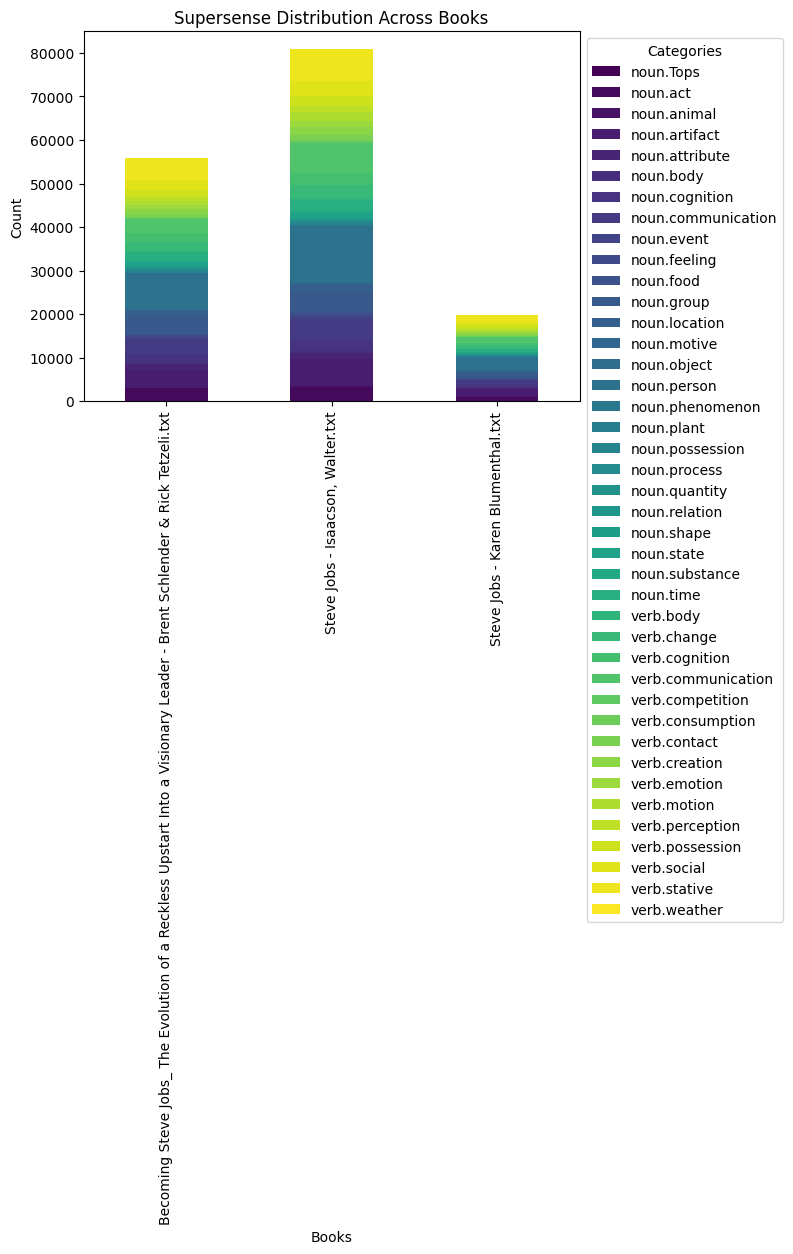

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_supersense_file.csv' with the actual path to your CSV file
csv_file_path = 'Supersenses.csv'

# Read CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path, index_col=0)  # Assuming the first column contains book names

# Plot a bar chart
plt.figure(figsize=(12, 8))
df.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Supersense Distribution Across Books')
plt.xlabel('Books')
plt.ylabel('Count')
plt.legend(title='Categories', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')